## Non-Dominated Sorting on Actv/Hemo Predictors
### 1 evaluate on HydrAMP MIC dataset and basic analysis
#### 1.1 correlation between socres and (label) values
#### 1.2 scatter plot in (multi-score) space
### 2 non-dominated sorting

In [5]:
import os
import sys
import pandas as pd
sys.path.append('../')

from factory import get_sklearn_scorer

In [3]:
scorer_actv = get_sklearn_scorer(task='actv') 
scorer_hemo = get_sklearn_scorer(task='hemo') 


In [14]:
repo_path = '/home/ulamaca/projects/14_ngs2_mo_pep_opt/'
df = pd.read_csv(os.path.join(repo_path,'data/hydramp/mic_data.csv'), index_col=None)
df = df.iloc[:, 1:]
df['activity'] = df['value'].apply( lambda x: 1 if x <= 1.5 else 0)

In [18]:
from pandarallel import pandarallel # this is a default!? for pandas?
pandarallel.initialize(progress_bar=False)

# my laptop: 8m47s
df['p_hemo'] = df['sequence'].parallel_map(scorer_hemo.score_single_seq)
df['p_hemo'] = df['p_hemo'].apply(lambda x: x[0])

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [25]:
df['p_actv'] = df['sequence'].parallel_map(scorer_actv.score_single_seq)
df['p_actv'] = df['p_actv'].apply(lambda x: x[0])

In [26]:
output_path = '/home/ulamaca/projects/14_ngs2_mo_pep_opt/assets/processed'
output_file_path = os.path.join(output_path, 'mic_data_rf_scored.csv')
df.to_csv(output_file_path, index=None)

array([[<AxesSubplot:xlabel='value', ylabel='value'>,
        <AxesSubplot:xlabel='activity', ylabel='value'>,
        <AxesSubplot:xlabel='p_hemo', ylabel='value'>,
        <AxesSubplot:xlabel='p_actv', ylabel='value'>],
       [<AxesSubplot:xlabel='value', ylabel='activity'>,
        <AxesSubplot:xlabel='activity', ylabel='activity'>,
        <AxesSubplot:xlabel='p_hemo', ylabel='activity'>,
        <AxesSubplot:xlabel='p_actv', ylabel='activity'>],
       [<AxesSubplot:xlabel='value', ylabel='p_hemo'>,
        <AxesSubplot:xlabel='activity', ylabel='p_hemo'>,
        <AxesSubplot:xlabel='p_hemo', ylabel='p_hemo'>,
        <AxesSubplot:xlabel='p_actv', ylabel='p_hemo'>],
       [<AxesSubplot:xlabel='value', ylabel='p_actv'>,
        <AxesSubplot:xlabel='activity', ylabel='p_actv'>,
        <AxesSubplot:xlabel='p_hemo', ylabel='p_actv'>,
        <AxesSubplot:xlabel='p_actv', ylabel='p_actv'>]], dtype=object)

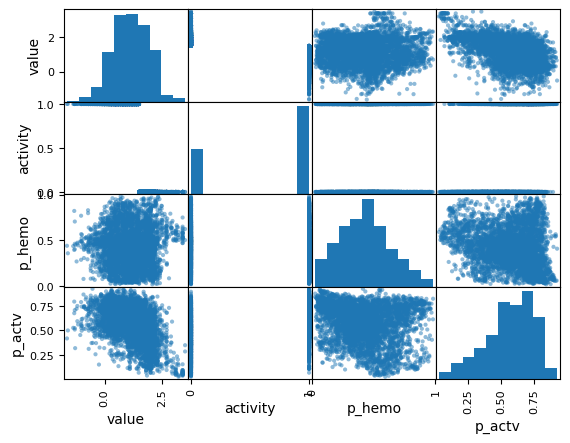

In [27]:
pd.plotting.scatter_matrix(df)